<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


In [97]:
# Carga de librerias
#Python
import matplotlib.pyplot as plt
import numpy as np

#Sklearn
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import TruncatedSVD

### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [48]:
# Utilice este espacio para escribir el código.

data=fetch_lfw_people(min_faces_per_person=25)

Se descarga la data usando la funcion cargada y se elige que min_faces_per_person sea igual a 25, es decir que se descargue imagenes para individuos que tengan al menos 25 imagenes

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [49]:
# Utilice este espacio para escribir el código.
print(type(data))

print(data.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


Se tiene datos en clase sklearn.utils._bunch.Bunch.

Como se puede ver es un diccionario con 'data', 'images', 'target', 'target_names', 'DESCR'

'data': Contiene los datos de las características del dataset en forma de un array de NumPy

'images': Contiene las imágenes en formato de array de NumPy.

'target':Contiene las etiquetas o clases objetivo para cada ejemplo en el dataset.

'target_names':Es una lista que contiene los nombres de las clases o etiquetas.

'DESCR':Contiene una descripción del dataset.


In [50]:
X = data['data']
print(X.shape)

(1909, 2914)


Indica que cada una de las 1909 imagenes en el dataset ha sido aplanada en un vector unidimensional que describe los valores de los pixeles, esto se hace para poder ser usados por algoritmos de aprendizaje

In [96]:
imagenes = data['images']
print(imagenes.shape)

(1909, 62, 47)


In [ ]:
num_img = len(data.images)
num_img

1909

En este caso se ve que hay 1909 imagenes, con altura de 62 pixeles x ancho de 47 pixeles

In [53]:
target_names = data['target_names']
print(target_names)

['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Bill Clinton' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Hans Blix'
 'Jacques Chirac' 'John Ashcroft' 'Junichiro Koizumi' 'Kofi Annan'
 'Laura Bush' 'Lleyton Hewitt' 'Megawati Sukarnoputri' 'Serena Williams'
 'Tom Daschle' 'Tony Blair' 'Vicente Fox' 'Vladimir Putin']


In [ ]:
num_clases = len(data.target_names)
num_clases

23

Estos target names, son las caras de las personas que se tienen en el dataset, en este caso son 23, y la idea de este taller fue hacer que cada una tuviera por lo menos 25 imagenes para ser entrenado

In [54]:
description = data['DESCR']
print(description)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

Esta descripcion de arriba explica que se tienen las fotos de las personas centradas en sus caras y un target name que dice quien es. Se puede usar esta base de datos tanto para una clasificacion binaria para saber si dos imagenes son de la misma persona, o reconocimiento facial. Esta ultima sera en la que se basara este taller

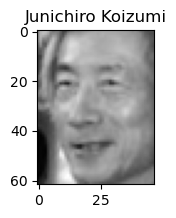

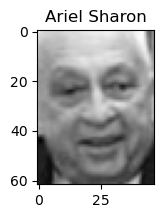

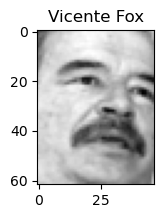

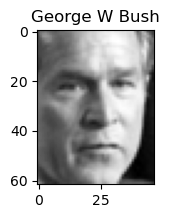

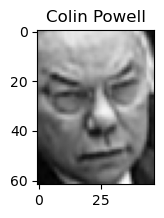

In [63]:
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(data.images[i], cmap='gray')
    plt.title(data.target_names[data.target[i]])
    plt.show()

Se puede ver entonces que es posible ver la cara de las personas y su nombre, estos son solo los primeros 5

In [66]:
imagenes_clases = [np.sum(data.target == i) for i in range(num_clases)]
for i, nombre_clase in enumerate(target_names):
    print(f"{nombre_clase}: {imagenes_clases[i]} imágenes")

Alejandro Toledo: 39 imágenes
Alvaro Uribe: 35 imágenes
Andre Agassi: 36 imágenes
Ariel Sharon: 77 imágenes
Bill Clinton: 29 imágenes
Colin Powell: 236 imágenes
Donald Rumsfeld: 121 imágenes
George W Bush: 530 imágenes
Gerhard Schroeder: 109 imágenes
Gloria Macapagal Arroyo: 44 imágenes
Hans Blix: 39 imágenes
Jacques Chirac: 52 imágenes
John Ashcroft: 53 imágenes
Junichiro Koizumi: 60 imágenes
Kofi Annan: 32 imágenes
Laura Bush: 41 imágenes
Lleyton Hewitt: 41 imágenes
Megawati Sukarnoputri: 33 imágenes
Serena Williams: 52 imágenes
Tom Daschle: 25 imágenes
Tony Blair: 144 imágenes
Vicente Fox: 32 imágenes
Vladimir Putin: 49 imágenes


Se pudo observar tambien el numero de imagenes por politico en la base de datos para cada uno de los 23 politicos en la data

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

Tanto como se vio anteriormente como se puede ver ahora con la grafica la distribucion de imagenes por individuo es:

George W Bush: 530 imágenes

Colin Powell: 236 imágenes

Tony Blair: 144 imágenes

Donald Rumsfeld: 121 imágenes

etc

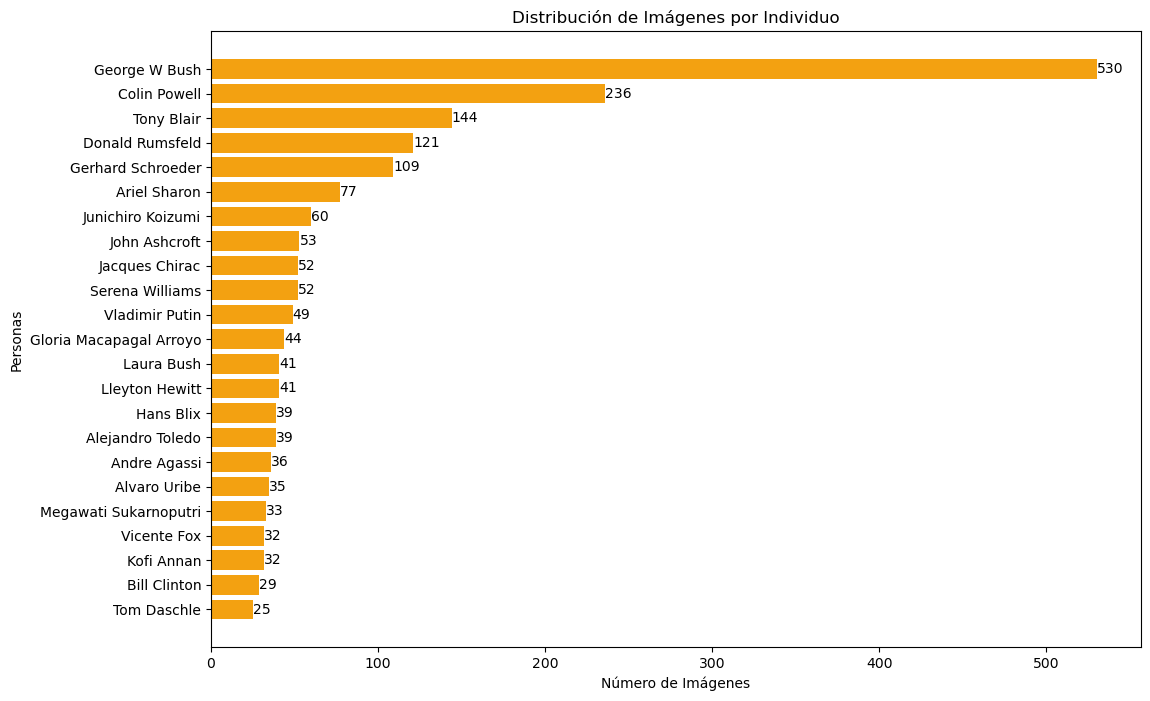

In [71]:
# Utilice este espacio para escribir el código.
indices_org = np.argsort(imagenes_clases)
imagenes_clases_org = np.array(imagenes_clases)[indices_org]
target_names_org = np.array(target_names)[indices_org]

# Graficar la distribución
plt.figure(figsize=(12, 8))
bars = plt.barh(target_names_org, imagenes_clases_org, color='#f3a111')


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
             va='center', ha='left', color='black', fontsize=10)
    

plt.xlabel('Número de Imágenes')
plt.ylabel('Personas')
plt.title('Distribución de Imágenes por Individuo')
plt.show()

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Como se vio antes Serena Williams: 52 imágenes, tambien se puede volver a calcular:

In [89]:
# Utilice este espacio para escribir el código.

# Índice de Serena Williams en Target
indice_s = np.where(target_names == 'Serena Williams')[0][0]

# Índices de las imágenes de Serena Williams
imagenes_s = np.where(data.target == indice_s)[0]

# Guardar los índices en una lista
indices_imagenes_s = imagenes_s.tolist()

    
print("Cantidad de imagenes de Serena Williams", len(indices_imagenes_s))

Cantidad de imagenes de Serena Williams 52


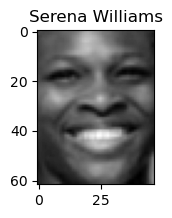

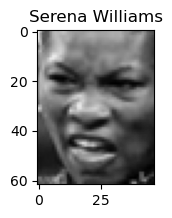

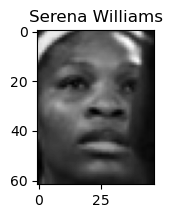

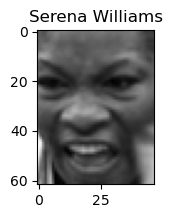

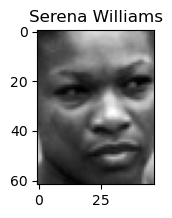

In [82]:
for i in  indices_imagenes_s[:5]:
    plt.figure(figsize=(2, 2))
    plt.imshow(data.images[i], cmap='gray')
    plt.title(data.target_names[data.target[i]])
    plt.show()

De esta forma se buscan unicamente los valores que pertenecen a Serena y vemos 5 imagenes de ella

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

Rostro promedio:  [[0.34809175 0.35850203 0.37775037 ... 0.36462724 0.35453224 0.35166016]
 [0.35268176 0.36681458 0.39138198 ... 0.37217653 0.3560393  0.35020757]
 [0.3594219  0.37759942 0.4061167  ... 0.3829281  0.36062098 0.350876  ]
 ...
 [0.3361509  0.34804884 0.36064583 ... 0.44640002 0.426514   0.40908542]
 [0.328926   0.34204617 0.3584552  ... 0.4544496  0.4321766  0.41176146]
 [0.32199988 0.335487   0.35446325 ... 0.46043864 0.4355333  0.41186363]]


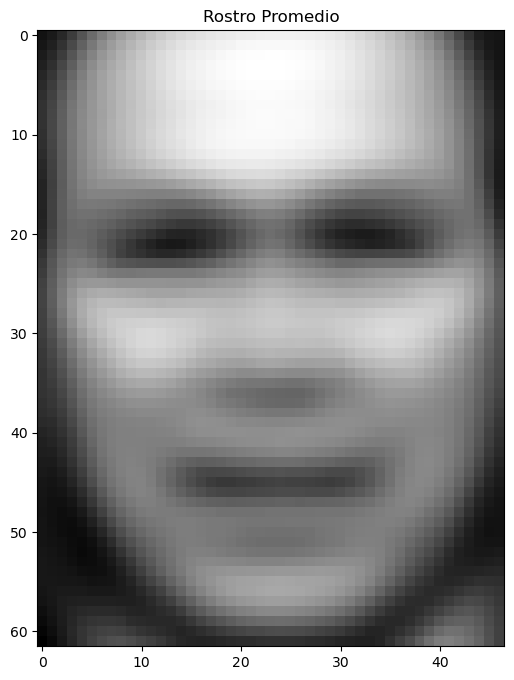

In [90]:
# Utilice este espacio para escribir el código.

imagenes = data.images

rostro_promedio = np.mean(imagenes, axis=0)

print("Rostro promedio: ",rostro_promedio)

# Graficar el rostro promedio
plt.figure(figsize=(8, 8))
plt.imshow(rostro_promedio.reshape(imagenes.shape[1], imagenes.shape[2]), cmap='gray')
plt.title('Rostro Promedio')
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

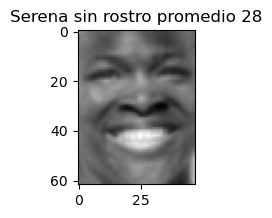

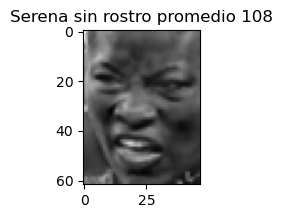

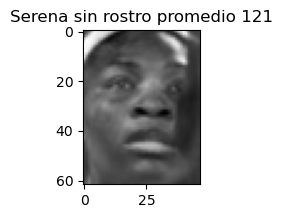

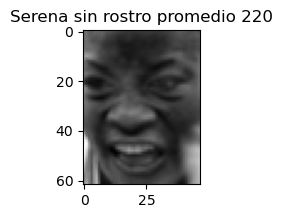

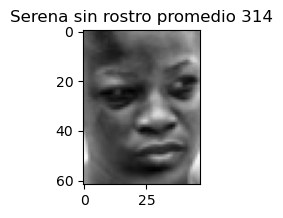

In [95]:
# Utilice este espacio para escribir el código.
imagenes_sin_rostro_promedio = imagenes - rostro_promedio

imagenes_serena_sin_promedio = imagenes_sin_rostro_promedio[imagenes_s]

for i in indices_imagenes_s[:5]:
    plt.figure(figsize=(2, 2))
    plt.imshow(imagenes_serena_sin_promedio[indices_imagenes_s.index(i)].reshape(imagenes.shape[1], imagenes.shape[2]), cmap='gray')
    plt.title(f"Serena sin rostro promedio {i}")
    plt.show()

Una vez se quita el rostro promedio de lso datos y se vuelve a graficas se puede ver que la imagen se distorisiona. Restar el rostro promedio a cada imagen sirve para resaltar características individuales de las imágenes en lugar de mostrar el rostro promedio común. El rostro promedio representa las características comunes en todas las caras en las imágenes de la base de datos. Restar la cara promedio ayuda a eliminar informacion no relevante, destacando las diferencias individuales entre las imágenes.

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

Proporción de la varianza representada por los primeros 1000 valores singulares: 1.0000


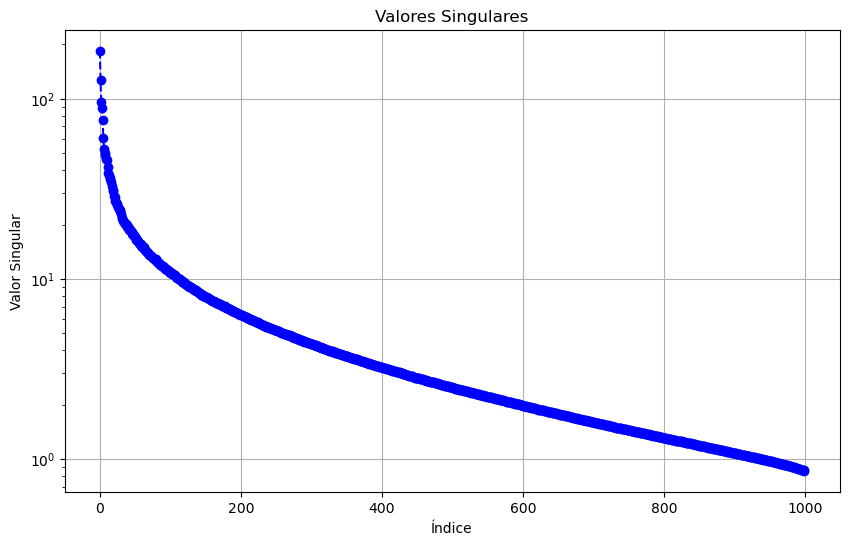

In [104]:
# Utilice este espacio para escribir el código.
n_imagenes, altura, ancho = imagenes_sin_rostro_promedio.shape

imagenes_a_planar = imagenes_sin_rostro_promedio.reshape(n_imagenes, altura * ancho)


svd = TruncatedSVD(n_components=1000)
imagenes_svd = svd.fit_transform(imagenes_a_planar)

valores_singulares = svd.singular_values_

# Varianza explicada por los primeros K valores singulares
varianza_total = np.sum(valores_singulares**2)
varianza_explicada = np.sum(valores_singulares[:1000]**2)
proporcion_varianza = varianza_explicada / varianza_total

print(f"Proporción de la varianza representada por los primeros 1000 valores singulares: {proporcion_varianza:.4f}")

# Opcional: Graficar los valores singulares
plt.figure(figsize=(10, 6))
plt.plot(valores_singulares, marker='o', linestyle='--', color='b')
plt.title('Valores Singulares')
plt.xlabel('Índice')
plt.ylabel('Valor Singular')
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [ ]:
from sklearn.linear_model import LogisticRegression

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)

# Utilice este espacio para escribir el código restante.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).